Name: Kai Chung, Ying

Course Name: CSC 594

Course Section: 901

HomeWork #3 - Part 1

##Part I: Words used in Pre vs. Post WWI inaugural addresses

##Part-1: Step 1 - Step 4

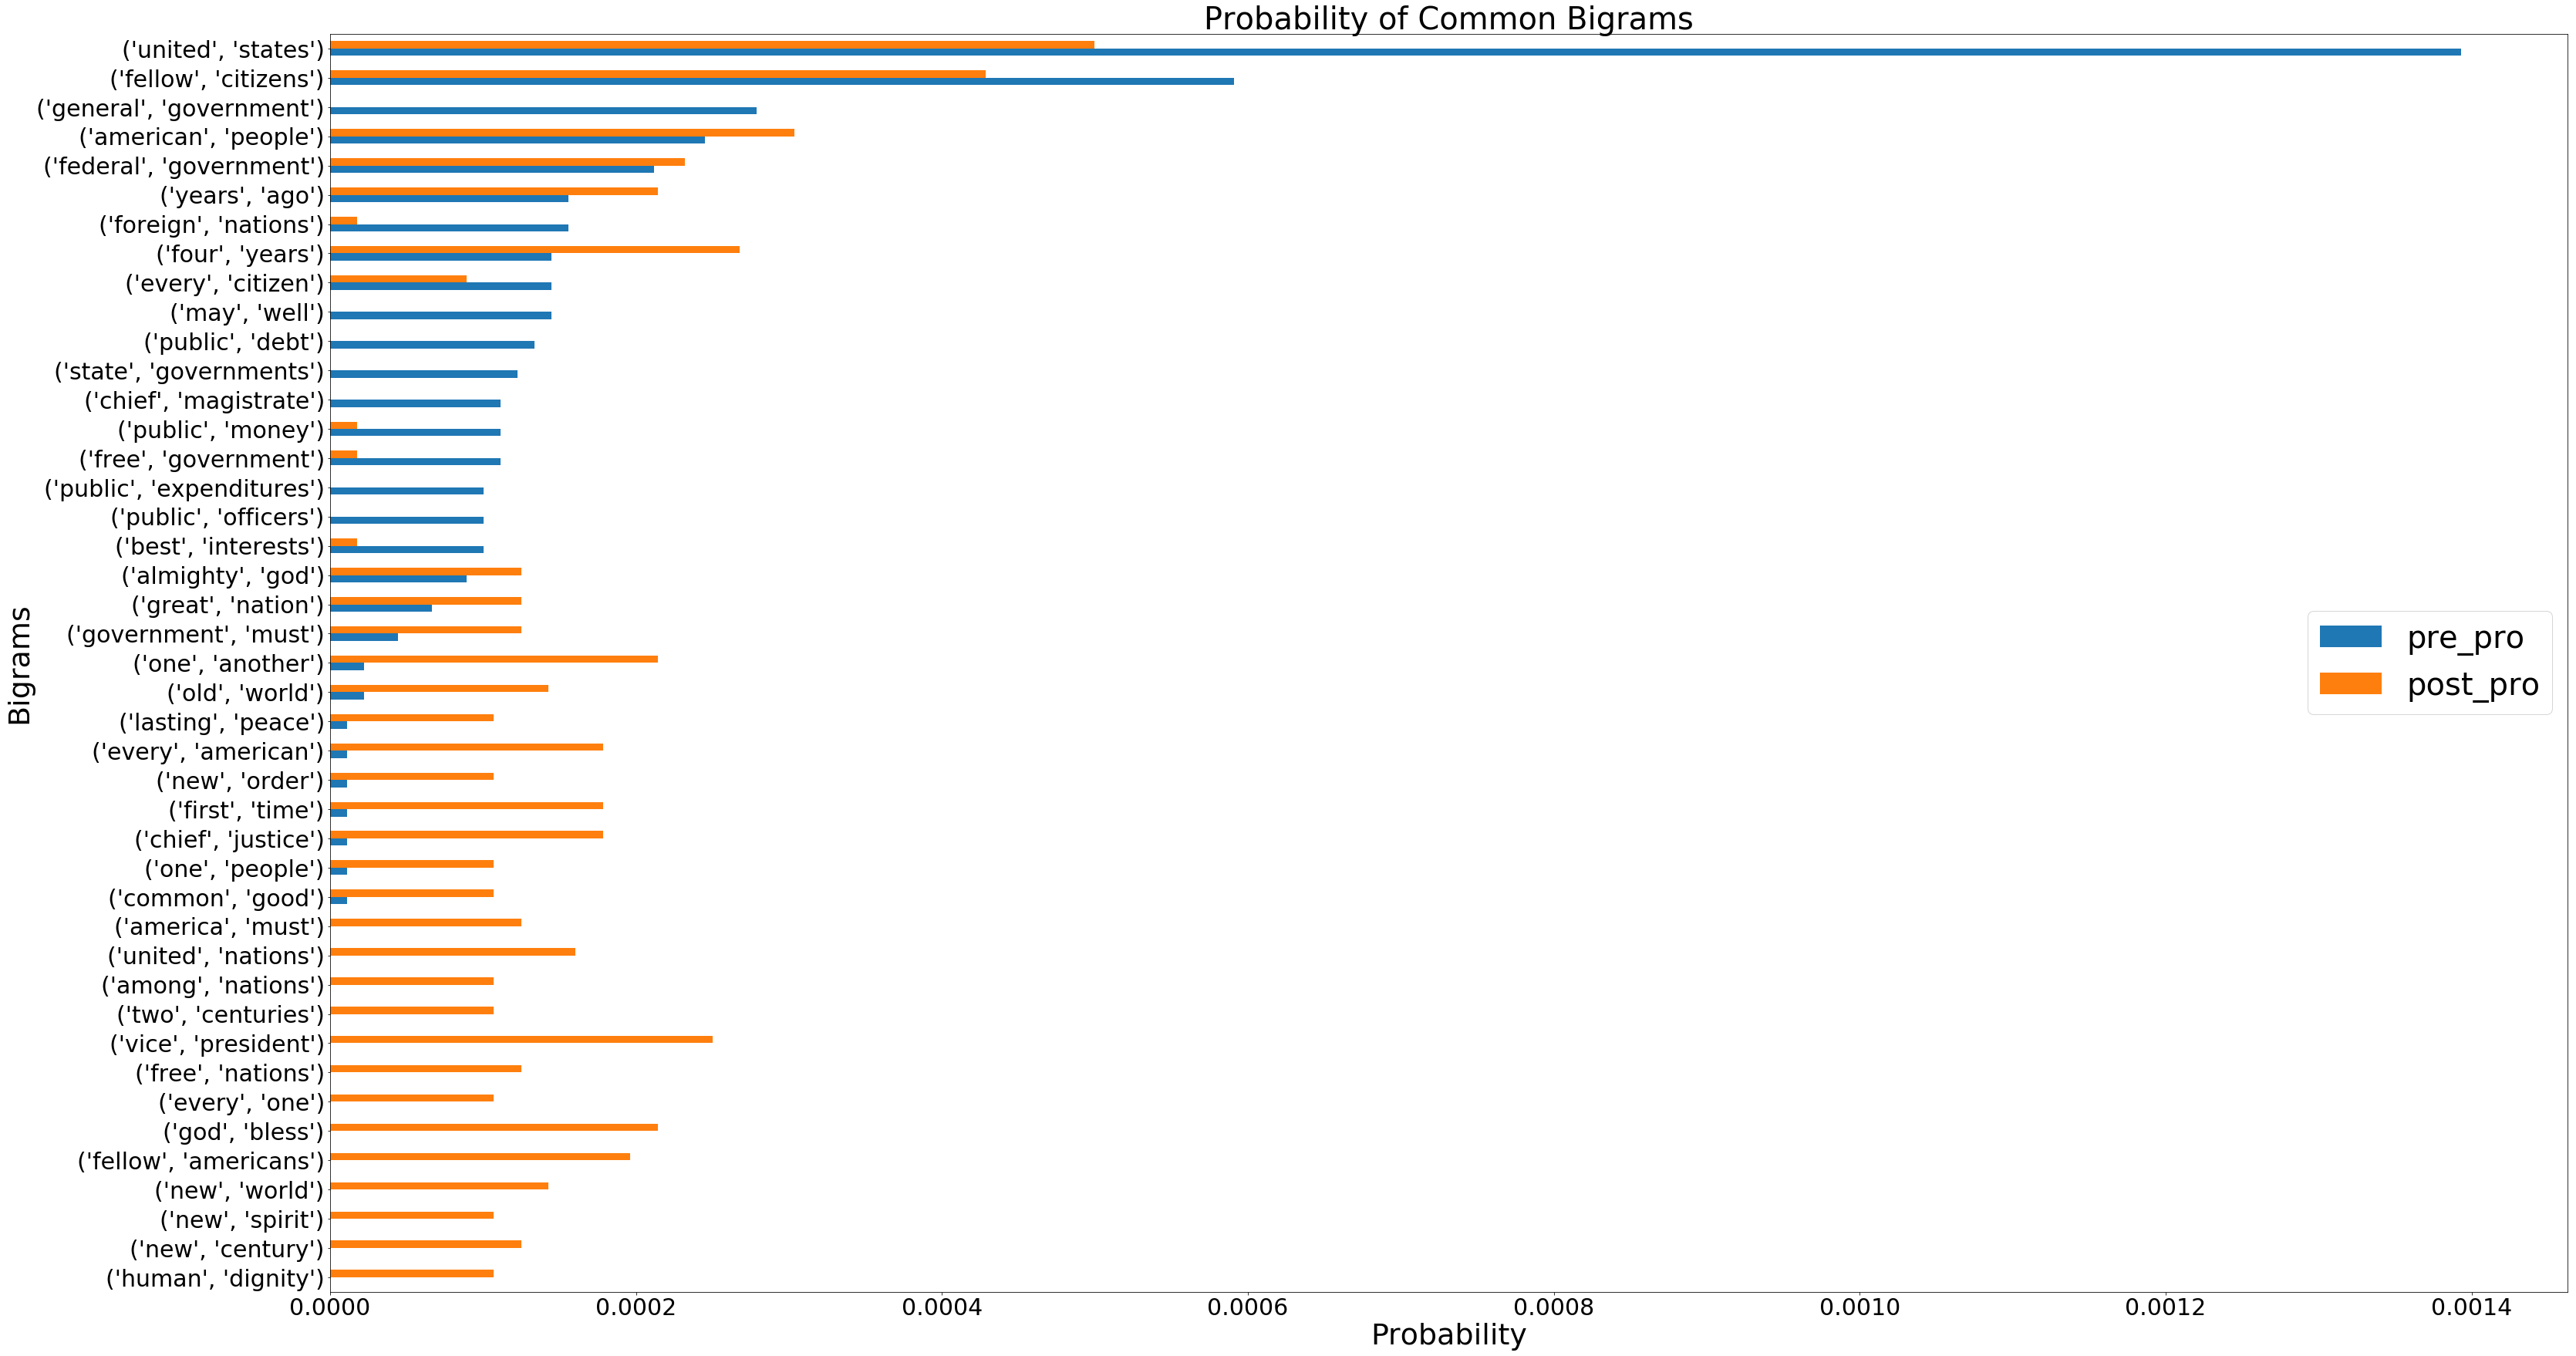

In [1]:
import pandas as pd
import numpy as np
import math
import nltk
from nltk.corpus import inaugural
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

##Part-1-1: Divide it into two datasets: preWWI (till 1913) and postWWI (after 1917).
preWWI_lst = [] #Create list to collect preWWI (till 1913) fileids
postWWI_lst =[] #Create list to collect postWWI (after 1917) fileids

#Call the fileids from inaugural and iterating the fileids
for fileid in inaugural.fileids():
    if int(fileid[0:4])<=1913: #Collect the fileids before or on 1913
        preWWI_lst.append(fileid)
    elif int(fileid[0:4]) >= 1917: #Collect the fileids after on 1917
        postWWI_lst.append(fileid)
    else:
        pass
    
##Part-1-2: Normalize the text for each dataset by down-casing all words 
##(but no stemming or lemmatization).
##Pre-WWI
pre_words_lst = [] #Initialize list
for i in range(len(preWWI_lst)):
    pre_words_lst.append(list(inaugural.words(preWWI_lst[i]))) #Collect Unigrams for pre-WWI
    
pre_words_lst2 = [] #Initialize list
for i in range(len(pre_words_lst)):
    pre_words_lst2 = pre_words_lst2 + pre_words_lst[i]
#Combine ALL Unigrams in one list and down-casing ALL words    
pre_words_lst2 = [word.lower() for word in pre_words_lst2] 

##Post-WWI
post_words_lst = [] #Initialize list
for i in range(len(postWWI_lst)):
    post_words_lst.append(list(inaugural.words(postWWI_lst[i]))) #Collect Unigrams for pre-WWI
    
post_words_lst2 = []#Initialize list
for i in range(len(post_words_lst)):
    post_words_lst2 = post_words_lst2 + post_words_lst[i] 
#Combine ALL Unigrams in one list and down-casing ALL words        
post_words_lst2 = [word.lower() for word in post_words_lst2]


##Part-1-3: For each dataset, compute the frequency distribution (i.e., probability) of unigrams and bigrams. 
##Then Union the top 200 of unigrams and bigrams from both datasets (i.e. pre-WWI and post-WWI) 
##and then write two output files -- one for unigrams and one for bigrams.
##Unigrams
#Count the frequency of words appearing preWWI dataset into dictionary
pre_fduni = nltk.FreqDist(pre_words_lst2)
post_fduni = nltk.FreqDist(post_words_lst2)

#Sort out the top 200 unigrams from pre-WWI
count=0
pre_top_lst=[]
for k in sorted(pre_fduni, key=pre_fduni.get, reverse=True):
    pre_top_lst.append(k)
    count+=1
    if count>199:
        break

#Sort out the top 200 from post-WWI        
count=0
post_top_lst=[]
for k in sorted(post_fduni, key=post_fduni.get, reverse=True):
    post_top_lst.append(k)
    count+=1
    if count>199:
        break

#Union the Unigrams from pre-WWI and post-WWI datasets
union_top_lst = set(pre_top_lst+post_top_lst)
with open("unigrams.txt","w") as f:
    f.write("{0:<17}{1}    {2}\n".format("unigram", "pre-WWI","post_WWI"))
    f.write("%s\n"%("="*37))
    for item in sorted(union_top_lst):
        if len(item)>2 and item not in stopwords.words():
            f.write("{0:<17}{1:0.7f}  {2:0.7f}\n".format(item, 
                  pre_fduni[item]/ len(pre_words_lst2)
                  , post_fduni[item]/len(post_words_lst2)))        


##Bigrams            
#Generate bigram from unigrams list
pre_bigrams = list(nltk.bigrams(pre_words_lst2))
#Exploit the FreqDist function to find out the Frequency of Bigrams from pre-WWI dataset
pre_fdbi = nltk.FreqDist(pre_bigrams)

#Sort out the top 1000 Bigrams from pre-WWI
count=0
pre_top_lst=[]
value=0
for k in sorted(pre_fdbi, key=pre_fdbi.get, reverse=True):
    pre_top_lst.append(k)
    count+=1    
    if count==999:
        value = pre_fdbi[k]
        #print(count)
    elif count>999:
        if value == pre_fdbi[k]:
            pass
        else:
            break

#Generate bigram from unigrams list            
post_bigrams = list(nltk.bigrams(post_words_lst2))
#Exploit the FreqDist function to find out the Frequency of Bigrams from post-WWI dataset
post_fdbi = nltk.FreqDist(post_bigrams)
#Sort out the top 1000 Bigrams from post-WWI
count=0
post_top_lst=[]
for k in sorted(post_fdbi, key=post_fdbi.get, reverse=True):
    post_top_lst.append(k)
    count+=1
    if count==999:
        value = post_fdbi[k]
        #print(count)
    elif count>999:
        if value == post_fdbi[k]:
            pass
        else:
            break
        
union_top_lst=set(post_top_lst+pre_top_lst)  
n=0
k_lst=[]
v1_lst=[]
v2_lst=[]

with open("bigrams.txt","w") as f:
    f.write("{0:<29}{1}     {2}\n".format("bigram", "pre-WWI","post_WWI"))
    f.write("%s\n"%("="*50))
    for item in sorted(union_top_lst):
        if len(item[0])>2 and len(item[1])>2 and item[0] not in stopwords.words() and item[1] not in stopwords.words():
            n+=1
            #print(n)
            k_lst.append(str(item))
            v1_lst.append(pre_fdbi[item]/ len(pre_bigrams))
            v2_lst.append(post_fdbi[item]/len(post_bigrams))
            f.write("{0:<28}{1: 0.7f}   {2:0.7f}\n".format(str(item), pre_fdbi[item]/ len(pre_bigrams),post_fdbi[item]/len(post_bigrams)))
f.close()                        


##Part-1-4: Barplot the top 50 frequency of bigrams
bigram_df =pd.DataFrame(list(zip(k_lst,v1_lst,v2_lst)), columns=["bigrams","pre_pro","post_pro"])
bigram_df = bigram_df.sort_values(by=["pre_pro"])
fig=plt.figure(figsize=(52,30))
ax=fig.add_subplot(111)
bigram_df.plot(x=bigram_df.bigrams,kind='barh',legend=False, ax=ax)
plt.title("Probability of Common Bigrams", size=40 )
plt.xlabel("Probability", size=38)
plt.ylabel("Bigrams", size=38)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.legend(loc='center right', fontsize=40)
fig.savefig('Top_50_Bigram_plot.png')
plt.show()

##Part-1: Step 6

In [2]:
def make_cfdist(text, size=3):
    """
    Extract unigrams and two-word tuples in the windows and create a 
    FrequencyDist dictionary for both (and returns them in a list)
    """
    unigrams = []
    tuples = []
    # Scan over windows of the appropriate size.
    for center in range(size, len(text)-size):
        # enter the coocurrence (center word and each of all other words) in the dictionary
        wunis = set()
        wtuples = set() # for tuples in this context; set is to count only once
        thisword = text[center]
        
        # iterate though the test of the window
        for i in range(1, size+1): # i starts from 1 (center +/- i)
            nextleft = text[center-i]
            nextright = text[center+i]
            # add them next word in this window's unigram set
            wunis.add(nextleft)
            wunis.add(nextright)
            # create the next left tuple
            if not thisword == nextleft:
                if thisword < nextleft:
                    tup = (thisword,nextleft)
                else:
                    tup = (nextleft,thisword)
                # and add it in this window's tuple set
                wtuples.add(tup) #
            # create the next right tuple
            if not thisword == nextright:
                if thisword < nextright:
                    tup = (thisword,nextright)
                else:
                    tup = (nextright,thisword)
                # and add it in this window's tuple set
                wtuples.add(tup) #
        
        # add all unigrams in the text tuples list
        for wuni in wunis:
            unigrams.append(wuni)
        # add all tuples in the text tuples list
        for wtup in wtuples:
            tuples.append(wtup)
            
    # create a frequency dictionary from unigrams and tuples
    ufd = nltk.FreqDist(unigrams)
    cfd = nltk.FreqDist(tuples)
    # and return the dictionaries in a list
    return [ufd, cfd]

In [3]:
##Calling the make_cfdist function to find Frequency Distribution of bigrams and unigrams 
##for both pre-WWI and post-WWI dataset
text = pre_words_lst2
pre_ufd, pre_cfd = make_cfdist(text, size=3)

text = post_words_lst2
post_ufd, post_cfd = make_cfdist(text, size=3)

##pre-WWI PMI Calculation
pre_cfd_lst=[]
for item in list(pre_cfd.keys()):
    if (item[0]=="economy") or (item[1] == "economy"):
        pre_cfd_lst.append(item)
        
#Collect frequency column after filtering
val_lst=[]
for key in pre_cfd_lst:
    val_lst.append(pre_cfd[key])

#Collect bigrams after filtering    
key1_lst = [item[0] for item in pre_cfd_lst]
key2_lst = [item[1] for item in pre_cfd_lst]

#Combine bigrams' terms and corresponding frequency
df_pre = pd.DataFrame(list(zip(key1_lst,key2_lst,val_lst)), columns=["key1","key2", "freq"])
#df.to_csv("pre_PMI_bigrams_filter.csv",index=False) 

#df_pre=pd.read_csv("pre_PMI_bigrams_filter.csv", index_col=False)

#Calculate PMI for pre-WWI
N = len(pre_words_lst2)
pre_PMI_lst=[]
for i in range(0, df_pre.shape[0]):
    w1 = df_pre.iloc[i].key1
    w2 = df_pre.iloc[i].key2
    bigram_cnt = int(df_pre.freq[df_pre.key1==w1][df_pre.key2==w2])
    w1_cnt = pre_ufd[w1]
    w2_cnt = pre_ufd[w2]

    pre_PMI_lst.append(math.log2((bigram_cnt*(N-3)) / (w1_cnt*w2_cnt)))

#Sort out all the bigrams include the word "economy" in either position for pre-WWI
df_pre["PMI"] = pre_PMI_lst
#pre_arr = np.array(df)
#j=1
#pre_final_lst=[]
#for i in range(len(pre_arr)):
#    if "economy" in pre_arr[i]:
#        #print(j, pre_arr[i])
#        pre_final_lst.append(pre_arr[i]) 

df_pre= np.array(df_pre)
pre_final_lst=[]
for i in range(0,df_pre.shape[0]):
    if len(df_pre[i][0])>2 and  len(df_pre[i][1])>2 and df_pre[i][0] not in stopwords.words() and  df_pre[i][1] not in stopwords.words():
        pre_final_lst.append(df_pre[i]) 

df_pre = pd.DataFrame(pre_final_lst, columns=["key1","key2","freq","PMI"])
df_pre.sort_values(by=["PMI"], ascending=False, inplace=True)
df_pre=df_pre.head(45)
df_pre.sort_values(by=["PMI" ,"key1", "key2"], ascending=[False, True, True], inplace=True)



##post-WWI PMI Calculation
post_cfd_lst=[]
for item in list(post_cfd.keys()):
    if (item[0]=="economy") or (item[1] == "economy"):
        post_cfd_lst.append(item)
        
#Collect frequency column after filtering
val_lst=[]
for key in post_cfd_lst:
    val_lst.append(post_cfd[key])

#Collect bigrams after filtering    
key1_lst = [item[0] for item in post_cfd_lst]
key2_lst = [item[1] for item in post_cfd_lst]

#Combine bigrams' terms and corresponding frequency
df_post=pd.DataFrame(list(zip(key1_lst,key2_lst,val_lst)), columns=["key1","key2", "freq"])
#df.to_csv("post_PMI_bigrams_filter.csv",index=False) 

#df_post=pd.read_csv("post_PMI_bigrams_filter.csv", index_col=False)

#Calculate PMI for post-WWI
N = len(post_words_lst2)
post_PMI_lst=[]
for i in range(0, df_post.shape[0]):
    w1 = df_post.iloc[i].key1
    w2 = df_post.iloc[i].key2
    bigram_cnt = int(df_post.freq[df_post.key1==w1][df_post.key2==w2])
    w1_cnt = post_ufd[w1]
    w2_cnt = post_ufd[w2]

    post_PMI_lst.append(math.log2((bigram_cnt*(N-3)) / (w1_cnt*w2_cnt)))

#Sort out all the bigrams include the word "economy" in either position for post-WWI
df_post["PMI"] = post_PMI_lst
#post_arr = np.array(df)
#j=1
#post_final_lst=[]
#for i in range(len(post_arr)):
#    if "economy" in post_arr[i]:
#        #print(j, post_arr[i])
#        post_final_lst.append(post_arr[i])    
        
        
df_post= np.array(df_post)
post_final_lst=[]
for i in range(0,df_post.shape[0]):
    if len(df_post[i][0])>2 and  len(df_post[i][1])>2 and df_post[i][0] not in stopwords.words() and  df_post[i][1] not in stopwords.words():
        post_final_lst.append(df_post[i]) 

df_post = pd.DataFrame(post_final_lst, columns=["key1","key2","freq","PMI"])
df_post.sort_values(by=["PMI"], ascending=False, inplace=True)
df_post=df_post.head(45)
df_post.sort_values(by=["PMI" ,"key1", "key2"], ascending=[False, True, True], inplace=True)

##Print Bigrams and PMI on txt file
with open("pmi.txt", "w") as f:
    f.write("{0:>12}{1:>40}\n".format("pre-WWI","post-WWI" ))
    f.write("%s\n"%("="*80))
    for i in range(0, df_pre.shape[0]):
        f.write("{0:2}  {1:<26} {2:0.7f}".format(i+1,"("+df_pre.iloc[i].key1+", "+df_pre.iloc[i].key2+")",df_pre.iloc[i].PMI,))
        f.write("{0:>3}{1:<27} {2:0.7f}\n".format(" ","("+df_post.iloc[i].key1+", "+df_post.iloc[i].key2+")",df_post.iloc[i].PMI,))
f.close()



##Extra Credit

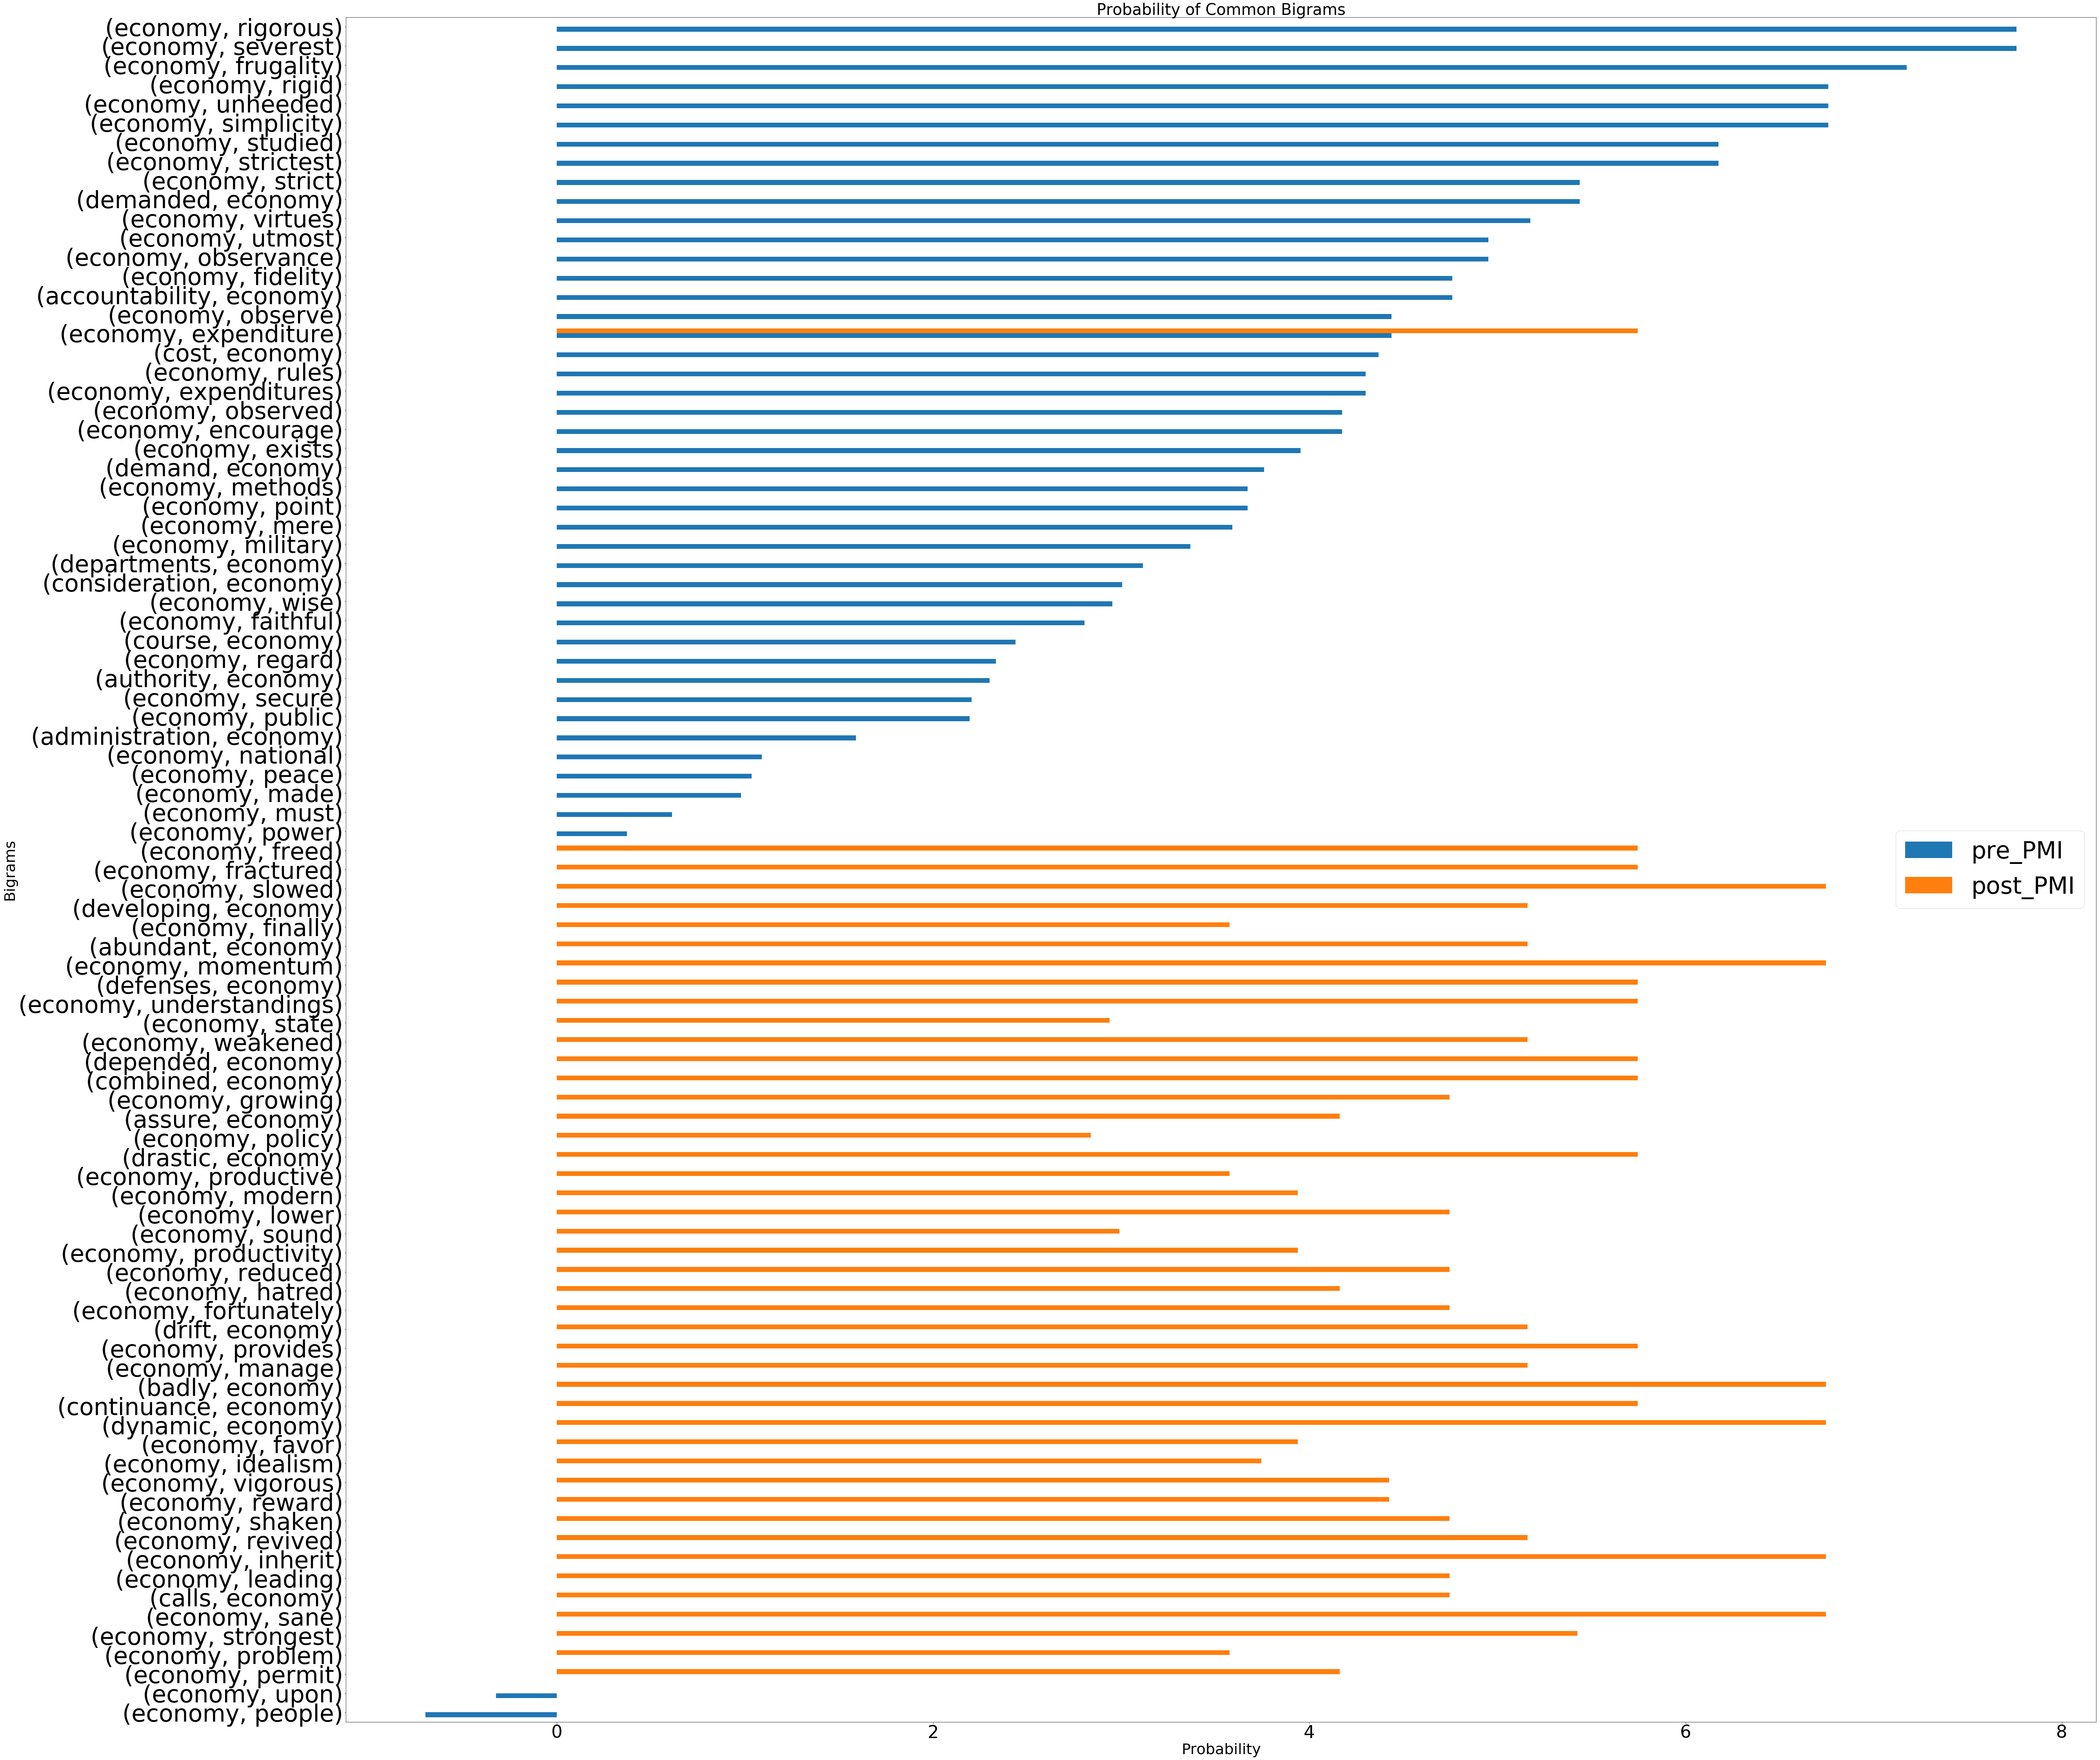

All Done!!!
All Output files are saved in the same directory as this ipynb file 


In [4]:
##Collect the union of the bigrams from pre-WWI and post_WWI related to the word "economy"
df_pre_key12=[]
for i in range(0,df_pre.shape[0]):
    df_pre_key12.append("(%s, %s)"%(df_pre.iloc[i].key1,df_pre.iloc[i].key2))
df_pre["bigrams"] = df_pre_key12

df_post_key12=[]
for i in range(0,df_post.shape[0]):
    df_post_key12.append("(%s, %s)"%(df_post.iloc[i].key1,df_post.iloc[i].key2))
df_post["bigrams"] = df_post_key12


#Collect PMI value to the corresponding bigrams from pre-WWI and post-WWI
pre_PMI_lst=[]
cnt=0
bigrams_lst = list(set(df_pre_key12+df_post_key12))
while cnt<=len(bigrams_lst):
    try:
        pre_PMI_lst.append(float(df_pre["PMI"][df_pre.bigrams == bigrams_lst[cnt]]))
        cnt+=1
    except:
        pre_PMI_lst.append(0)
        cnt+=1

post_PMI_lst=[]
cnt=0
bigrams_lst = list(set(df_pre_key12+df_post_key12))
while cnt<=len(bigrams_lst):
    try:
        post_PMI_lst.append(float(df_post["PMI"][df_post.bigrams == bigrams_lst[cnt]]))
        cnt+=1
    except:
        post_PMI_lst.append(0)
        cnt+=1      

#Combine the bigrams tokens and PMI values to one table        
df = pd.DataFrame(list(zip(bigrams_lst,pre_PMI_lst,post_PMI_lst)), columns=["bigrams","pre_PMI","post_PMI"])
df.sort_values(by = ["pre_PMI"], ascending =[True], inplace=True)

#Barplot the top 45 PMI frequency of bigrams with "economy" word
fig=plt.figure(figsize=(80,80))
ax=fig.add_subplot(111)
df.plot(x=df.bigrams,kind='barh',legend=False, ax=ax)
plt.title("Probability of Common Bigrams", size=40 )
plt.xlabel("Probability", size=38)
plt.ylabel("Bigrams", size=38)
plt.tick_params(axis='x', labelsize=45)
plt.tick_params(axis='y', labelsize=60)
plt.legend(loc='center right', fontsize=60)
fig.savefig('Top_50_economy_Bigram_plot.png')
plt.show()        

print("All Done!!!")
print("All Output files are saved in the same directory as this ipynb file ")